<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Practice: Use the Sequential Constructor to Test the Test Sigmoid, Tanh, and Relu Activations Functions on the  MNIST Dataset</font></h1> 


# Table of Contents
In this lab, you will test Sigmoid, Tanh, and Relu activations functions on the MNIST dataset.

<div class="alert alert-block alert-info" style="margin-top: 20px">

<li><a href="#ref1">Neural Network Module and Training Function</a></li>
<li><a href="#ref2">Prepare Data </a></li>
<li><a href="#ref3">Define Criterion function</a></li>
<li><a href="#ref4">Practice:Test Sigmoid, Tanh, and Relu</a></li>
<li><a href="#ref4">Analyze Results</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

Import the following libraries:  

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

<a id="ref1"></a>
<h2 align=center>Neural Network Module and Training Function </h2> 

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data. 

In [9]:
def train(model,criterion, train_loader,validation_loader, optimizer, epochs=100):
    i=0
    useful_stuff={'training_loss':[],'validation_accuracy':[]}  
    
    #n_epochs
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):

            #clear gradient 
            optimizer.zero_grad()
            #make a prediction logits 
            z=model(x.view(-1,28*28))
            # calculate loss 
            loss=criterion(z,y)
    
            # calculate gradients of parameters 
            loss.backward()
            # update parameters 
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct=0
        for x, y in validation_loader:
            #perform a prediction on the validation  data  
            yhat=model(x.view(-1,28*28))
            
            _,lable=torch.max(yhat,1)
            correct+=(lable==y).sum().item()
            
        if epoch%5==0:
            print('epoch = %d'%epoch)
            print('current loss = %0.3f'%loss)
            print('')
 
    
        accuracy=100*(correct/len(validation_dataset))
   
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<a id="ref2"></a>
<h2 align=center>Prepare Data </h2> 

Load the training dataset by setting the parameter <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>:

In [3]:
train_dataset=dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameter <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>:

In [4]:
validation_dataset=dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [5]:
criterion=nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader objects: 

In [6]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)

<a id="ref3"></a>
<h2 align=center>Criterion Function</h2> 

Create the criterion function:  

In [7]:
criterion=nn.CrossEntropyLoss()

<a id="ref4"></a>
<h2 align=center>Test Sigmoid, Tanh, and Relu and Train the Model</h2> 

Use the following parameters to construct the model:

In [8]:
 input_dim=28*28
hidden_dim=100
output_dim=10

## Use nn.Sequential to build a one hidden layer neural  <code>model</code> network with a sigmoid activation to classify the 10 digits from the MNIST dataset.

In [12]:
model = nn.Sequential(nn.Linear(input_dim,hidden_dim),nn.Sigmoid(),nn.Linear(hidden_dim,output_dim))

In [13]:

learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
training_results=train(model,criterion, train_loader,validation_loader, optimizer, epochs=30)

epoch = 0
current loss = 2.301

epoch = 5
current loss = 2.256

epoch = 10
current loss = 2.215

epoch = 15
current loss = 2.163

epoch = 20
current loss = 2.115

epoch = 25
current loss = 2.042



Double-click __here__ for the solution.

<!-- 
model=nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
   
    nn.Sigmoid(),
    nn.Linear(hidden_dim, output_dim),

)    

-->

Train the network by using the Tanh activations function:

## Use nn.Sequential to build a one hidden layer neural  <code>model_Tanh</code> network with a Tanh activation to classify the 10 digits from the MNIST dataset.

In [14]:
model_Tanh = nn.Sequential(nn.Linear(input_dim,hidden_dim),nn.Tanh(),nn.Linear(hidden_dim,output_dim))

In [15]:
optimizer=torch.optim.SGD(model_Tanh.parameters(),lr=learning_rate)
training_results_tanch=train(model_Tanh,criterion, train_loader,validation_loader, optimizer, epochs=30)

epoch = 0
current loss = 2.178

epoch = 5
current loss = 1.676

epoch = 10
current loss = 1.246

epoch = 15
current loss = 0.969

epoch = 20
current loss = 0.823

epoch = 25
current loss = 0.696



Double-click __here__ for the solution.

<!-- 
model_Tanh=nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
   
    nn.Tanh(),nn.Linear(hidden_dim, output_dim),

)    
-->

## Use nn.Sequential to build a one hidden layer neural  <code>modelRelu</code> network with a Rulu activation to classify the 10 digits from the MNIST dataset.

In [16]:
modelRelu = nn.Sequential(nn.Linear(input_dim,hidden_dim),nn.ReLU(),nn.Linear(hidden_dim,output_dim))

In [17]:
optimizer=torch.optim.SGD(modelRelu.parameters(),lr=learning_rate)
training_results_tanch=train(modelRelu,criterion, train_loader,validation_loader, optimizer, epochs=30)

epoch = 0
current loss = 2.257

epoch = 5
current loss = 1.899

epoch = 10
current loss = 1.421

epoch = 15
current loss = 1.043

epoch = 20
current loss = 0.852

epoch = 25
current loss = 0.691



<!-- 
modelRelu=nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
   
    nn.Tanh(),nn.Linear(hidden_dim, output_dim),

)     
-->

Double-click __here__ for the solution.

<!-- 
modelRelu=torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
   
    nn.ReLU(),nn.Linear(hidden_dim, output_dim),)

-->


<a id="ref5"></a>
<h2 align=center>Analyze Results</h2> 

Compare the training loss for each activation:

NameError: name 'training_results_relu' is not defined

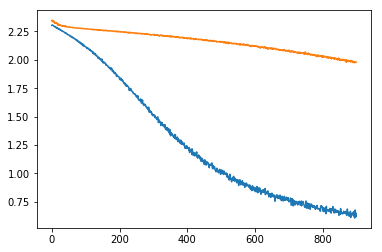

In [18]:
plt.plot(training_results_tanch['training_loss'],label='tanh')
plt.plot(training_results['training_loss'],label='sim')
plt.plot(training_results_relu['training_loss'],label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model:  

In [ ]:
plt.plot(training_results_tanch['validation_accuracy'],label='tanh')
plt.plot(training_results['validation_accuracy'],label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'],label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).